In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [64]:
#df=pd.read_csv('survey/co-presence/tij_pres_InVS15.dat',sep='\t',header=None)

# see http://www.sociopatterns.org/datasets/co-location-data-for-several-sociopatterns-data-sets/
df=pd.read_csv('survey/contact/tij_LyonSchool.dat',sep='\t',header=None) # primary school
df_meta=pd.read_csv('survey/metadata/metadata_LyonSchool.dat',sep='\t',header=None)




# df=pd.read_csv('survey/contact/tij_Thiers13.dat',sep='\t',header=None) # high school
# df_meta=pd.read_csv('survey/metadata/metadata_Thiers13.dat',sep='\t',header=None)


dev=[]

ref=0
cpt=-1
for k in df[0]:
    if np.abs(k-ref)>1000:
        cpt+=1
        dev.append(cpt)
        
    else:
        dev.append(cpt)
    ref=k
    
df['day']=dev



G=nx.MultiGraph()
mask=df[df['day']==1][[0,1,2]]
G.add_edges_from([tuple(k) for k in mask[[1,2]].values]) #, when=mask[0].values)



#df_meta=pd.read_csv('survey/metadata/metadata_Thiers13.dat',sep='\t',header=None)
df_meta= df_meta.set_index(0)
df_meta=df_meta.reindex(G.nodes())
df_meta['CAT']=pd.Categorical(df_meta[1])
#df_meta['CAT'].cat.codes

In [65]:
df_meta[1].unique()

array(['cm2a', 'cm1a', 'cpb', 'ce1b', 'ce2b', 'ce1a', 'cm1b', 'ce2a',
       'cpa', 'cm2b', 'teachers'], dtype=object)

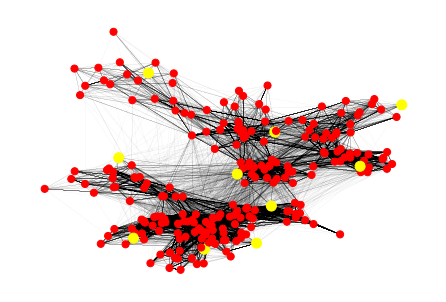

In [66]:

#mask.shape
#nx.draw(G, node_size=50, width=0.1/2, node_color='y')
nx.draw(G, node_size=[100 if k==10 else 50 for k in df_meta['CAT'].cat.codes], width=0.1/5, node_color=['yellow' if k==10 else 'red' for k in df_meta['CAT'].cat.codes])

In [67]:
list_of_pis_WW=[]
list_of_pis_EW=[]

for i in G.nodes():
    if df_meta.to_dict()[1][i] != 'teachers':

        ng=list(G.neighbors(i))

        nbt=0
        for k in ng:
            if df_meta.to_dict()[1][k]=='teachers':
                nbt+=1

        list_of_pis_EW.append(nbt/len(ng))
    else:
        
        ng=list(G.neighbors(i))

        nbt=0
        for k in ng:
            if df_meta.to_dict()[1][k]=='teachers':
                nbt+=1

        list_of_pis_WW.append(nbt/len(ng))    

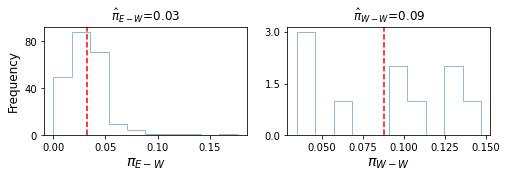

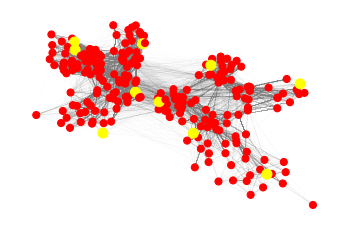

In [71]:
#fig, axs = plt.subplot_mosaic([['a)', 'b)', 'c)', 'c)'], ['a)', 'b)', 'c)', 'c)']], constrained_layout=True)

ncols=2
fig, axs = plt.subplots(ncols=ncols, figsize=(4*ncols, 2))


cpt=0
for ax in axs:
    if cpt==0:
        ax.hist(list_of_pis_EW, alpha=0.5, density=False, histtype="step")
        ax.axvline(x=np.asarray(list_of_pis_EW).mean(), color='r', ls='--')
        ax.set_xlabel(r'$\pi_{E-W}$', fontsize='x-large')
        ax.set_ylabel('Frequency', fontsize='large')
        ax.set_title(r'$\hat{\pi}_{E-W}}$='+str(np.round(np.asarray(list_of_pis_EW).mean(), 2)))
        #ax.text(ax.get_xticks().max()/2, ax.get_yticks().max()/2, r'$\pi$='+str(np.round(np.asarray(list_of_pis_EW).mean(), 2)))
        ax.set_yticks([0, 40, 80])
        cpt+=1
    elif cpt==1:
        ax.hist(list_of_pis_WW, alpha=0.5, density=False, histtype="step")
        ax.axvline(x=np.asarray(list_of_pis_WW).mean(), color='r', ls='--')
        ax.set_xlabel(r'$\pi_{W-W}$', fontsize='x-large')
        ax.set_title(r'$\hat{\pi}_{W-W}$='+str(np.round(np.asarray(list_of_pis_WW).mean(), 2)))
        #ax.text(ax.get_xticks().max()/2, ax.get_yticks().max()/2, r'$\pi$='+str(np.round(np.asarray(list_of_pis_WW).mean(), 2)))
        ax.set_yticks([0, 1.5, 3])
        cpt+=1
    #else:
        #nx.draw(G, node_size=[100 if k==10 else 50 for k in df_meta['CAT'].cat.codes], width=0.1/10, node_color=['yellow' if k==10 else 'red' for k in df_meta['CAT'].cat.codes], ax=ax, edge_color='gray')

        

fig.savefig('paper/figureSP1.pdf', bbox_inches='tight')

fig, ax = plt.subplots()
nx.draw(G, 
        node_size=[100 if k==10 else 50 for k in df_meta['CAT'].cat.codes], 
        width=0.1/10, 
        node_color=['yellow' if k==10 else 'red' for k in df_meta['CAT'].cat.codes], 
        ax=ax, 
        edge_color='gray')

fig.savefig('paper/networkSP1.pdf', bbox_inches='tight')
plt.show()

In [ ]:
(array([2.5 , 3.75, 0.  , 1.25, 0.  , 0.  , 1.25, 1.25, 1.25, 1.25]),

In [40]:
np.asarray([k[1] for k in G.degree]).mean()

547.4789915966387

In [12]:
# create weighted graph from M
M = nx.Graph()
for u,v,data in G.edges(data=True):
    w = data['weight'] if 'weight' in data else 1.0
    if M.has_edge(u,v):
        M[u][v]['weight'] += 1 #w
    else:
        M.add_edge(u, v, weight=w)

(array([ 2.,  3., 10., 19., 14., 20., 20., 10., 16., 14., 19., 16.,  5.,
        14., 10., 10.,  9., 11., 10.,  6.]),
 array([ 8., 12., 16., 20., 24., 28., 32., 36., 40., 44., 48., 52., 56.,
        60., 64., 68., 72., 76., 80., 84., 88.]),
 <BarContainer object of 20 artists>)

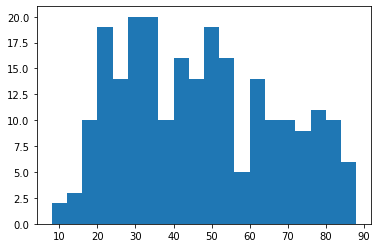

In [17]:
plt.hist(np.asarray([k[1] for k in M.degree]), 20)